# Master Curve Generation

A master curve is fit to viscoelastic data.  The master curve is found by reading in the raw data, shifting it, and fitting the shifted data points.  Curve fitting is accomplished with the `MasterCurve` object, as demonstrated in the cells to follow.

In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2
from matmodlab2 import *
from matmodlab2.fitting.mcgen import *

Populating the interactive namespace from numpy and matplotlib
Setting up the Matmodlab notebook environment


## Import the Data

Data is imported in to the `MasterCurve` object by the `Import` factory method.  The `MasterCurve.plot` method plots the data.  The keyword `raw` indicates that raw, unshifted data is to be plotted.

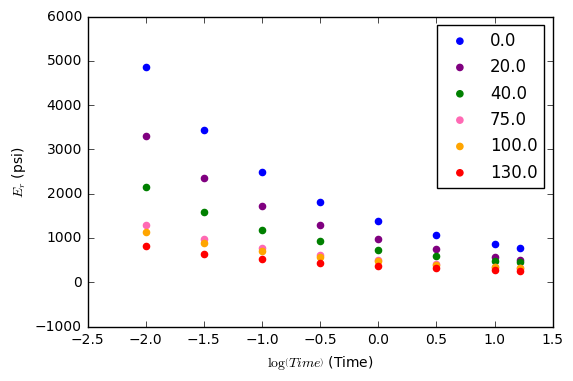

In [2]:
mc = MasterCurve.Import('mcgen.csv', yvar='E_r', yunits='psi')
mc.plot(raw=True)

## Fitting Data

The data are fit with the `MasterCurve.fit` method.  By default, the shifted data is fit to a Prony series.

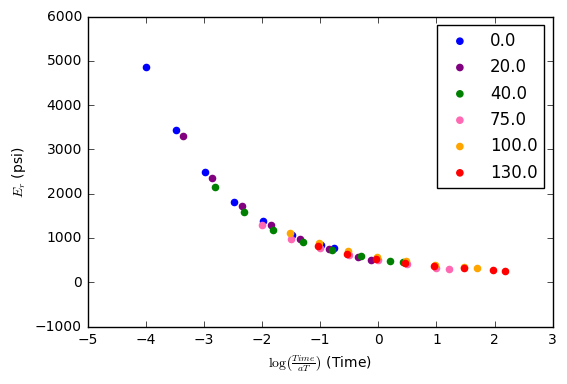

In [3]:
mc.fit()
mc.plot()

The master curve fit is plotted by setting the keyword `show_fit=True`

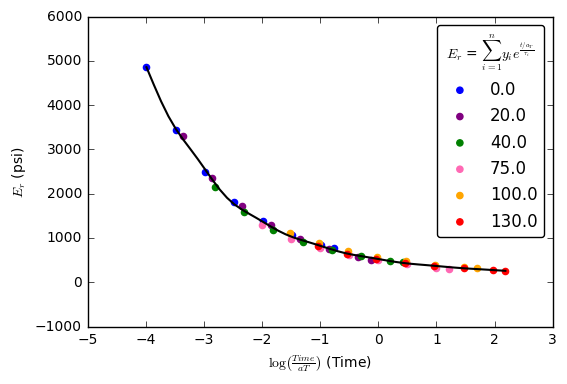

In [4]:
mc.plot(show_fit=True)

A description of the fit is printed to the screen with the `MasterCurve.description` property

In [5]:
mc.description

mcgen Version 1.2
Curve Fitter: Prony
Curve Fitting Information
tau_1,tau_2,tau_3,tau_4,tau_5,tau_6,tau_7
0.000100000000000000,0.001000000000000000,0.010000000000000000,0.100000000000000006,1.000000000000000000,10.000000000000000000,100.000000000000000000
y_1,y_2,y_3,y_4,y_5,y_6,y_7,y_inf
3151.792989212518477871,1999.638114092693740531,810.563266079278150755,435.084289976088655294,239.322095377830123653,114.163294480107481377,97.133449550895562652,238.101825181011292898
Fit Error
39.581373201190025668
WLF C1,WLF C2
6.793113271189012536,331.323540165621352571


The optimized $C_1$ and $C_2$ WLF coefficients are in the `MasterCurve.wlf_opt` attribute

In [6]:
mc.wlf_opt

array([   6.79311327,  331.32354017])

It is often necessary to supply initial guesses to the WLF coefficients, do so by passing to `MasterCurve.fit` the `wlf_coeffs` keyword

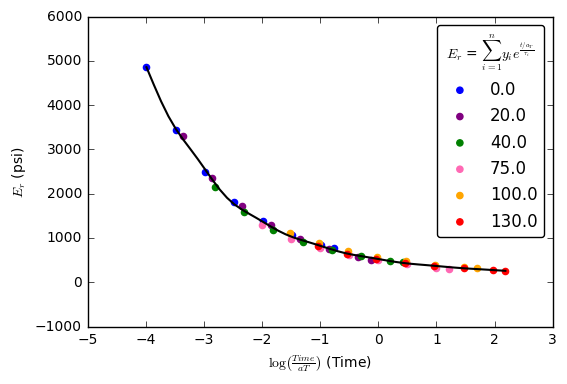

In [7]:
mc.fit(wlf_coeffs=[2, 300])
mc.plot(show_fit=True)

Other master curve fit types are available

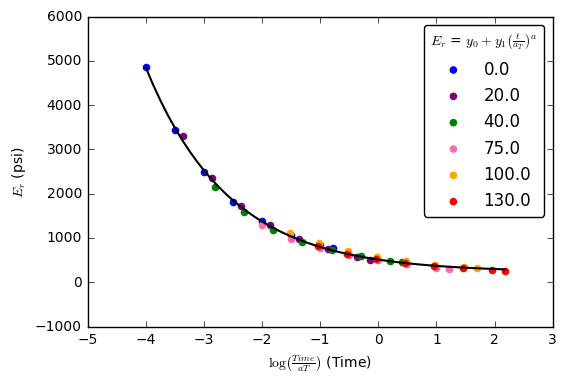

40.523176401110064

In [8]:
mc.fit(fitter=MODIFIED_POWER)
mc.plot(show_fit=True)
mc.fiterr

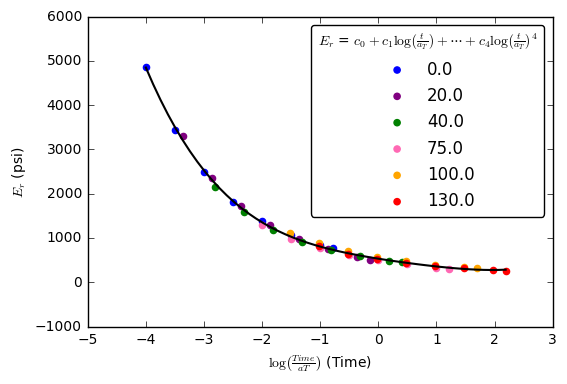

38.99975532713345

In [9]:
mc.fit(fitter=POLYNOMIAL, order=4)
mc.plot(show_fit=True)
mc.fiterr

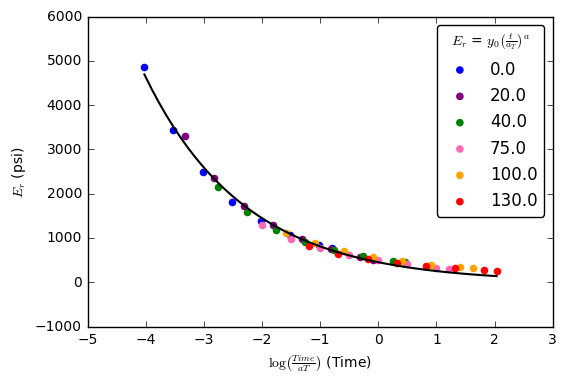

87.182941021049444

In [10]:
mc.fit(fitter=POWER)
mc.plot(show_fit=True)
mc.fiterr

## Exporting Fitted Data

Data can be exported to a number of file formats

In [11]:
mc.fit()
mc.Export('foo.csv')
#mc.Export('foo.xlsx')